# Importación de Librerias

In [1]:
# Librerias necesarias para el procesamiento y visualización de la información
import pandas as pd 
import os
import glob
from tqdm import tqdm 
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Ubicación de Archivos Enemdu

In [2]:
#Ubicación
path_enemdu = 'data_enemdu/'

In [3]:
# Código para obtener una lista de archivos encontrados en la carpeta de ubicación
archivos_enemdu = os.listdir(path_enemdu)
print('Lista de archivos Enemdu: ')
print(archivos_enemdu)

Lista de archivos Enemdu: 
['201712_EnemduBDD_15anios.sav', '201712_EnemduBDD_ambiente.sav', '201712_EnemduBDD_armonia.sav', '201712_EnemduBDD_consumidor.sav', '201712_EnemduBDD_financiero.sav', '201712_EnemduBDD_habitos.sav', '201712_EnemduBDD_salud_inseguridad.sav', '201712_EnemduBDD_viviendahogar.sav', 'df_resultado.sav']


In [4]:
# Lista de archivos con extencion ".sav"
lista_archivos_enemdu = []
for archivo in archivos_enemdu:
    if archivo.lower().endswith('.sav'):
        lista_archivos_enemdu.append(path_enemdu+archivo)
lista_archivos_enemdu

['data_enemdu/201712_EnemduBDD_15anios.sav',
 'data_enemdu/201712_EnemduBDD_ambiente.sav',
 'data_enemdu/201712_EnemduBDD_armonia.sav',
 'data_enemdu/201712_EnemduBDD_consumidor.sav',
 'data_enemdu/201712_EnemduBDD_financiero.sav',
 'data_enemdu/201712_EnemduBDD_habitos.sav',
 'data_enemdu/201712_EnemduBDD_salud_inseguridad.sav',
 'data_enemdu/201712_EnemduBDD_viviendahogar.sav',
 'data_enemdu/df_resultado.sav']

# Conversion de tablas de SPSS a Dataframe y Metadata

In [5]:
# Función para convertir en DataFrame y metadata a los archivos ".sav"
lista_df_enemdu = []
lista_meta_enemdu = []
for archivo_enemdu in tqdm(lista_archivos_enemdu):
    df, metadata = pyreadstat.read_sav(archivo_enemdu, apply_value_formats=False)
    lista_df_enemdu.append(df)
    lista_meta_enemdu.append(metadata)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.20it/s]


In [6]:
print("Cantidad de dataframe: ",len(lista_df_enemdu))
print("Cantidad de metadata: ",len(lista_meta_enemdu))

Cantidad de dataframe:  9
Cantidad de metadata:  9


# Asignacion de un DataFrame a una variable

In [7]:
# Adignar los cuadros de datos de empleo y vivienda a una variable que despliegue el dataframe
df_empleo = lista_df_enemdu[0]
df_vivienda = lista_df_enemdu[-1]
meta_empleo = lista_meta_enemdu[0]
meta_vivienda = lista_meta_enemdu[-1]

# Análisis del cuadro de datos

In [8]:
print('Estructura de datos filas x columnas df_empleo: ',df_empleo.shape)
print('Estructura de datos filas x columnas df_vivienda: ',df_vivienda.shape)

Estructura de datos filas x columnas df_empleo:  (110283, 313)
Estructura de datos filas x columnas df_vivienda:  (110283, 394)


# Merge de las etiquetas de columnas (metadata)

In [9]:
#Union de meta data
Lista_meta_vivienda=list(meta_vivienda.column_labels)
Lista_meta_empleo=list(meta_empleo.column_labels)
#Lista_meta_vivienda
meta_resultado = Lista_meta_empleo+Lista_meta_vivienda[8:89]
len(meta_resultado)

394

# Visualizacion de metadata

In [10]:
print('El archivo spss vivienda enemdu contiene {} etiquetas y la siguiente lista de encabezados o etiquetas:'.format(len(meta_vivienda.column_labels)))
#meta_vivienda.column_labels

El archivo spss vivienda enemdu contiene 394 etiquetas y la siguiente lista de encabezados o etiquetas:


In [11]:
print('El archivo spss empleo enemdu contiene {} etiquetas y la siguiente lista de encabezados o etiquetas:'.format(len(meta_empleo.column_labels)))
#meta_empleo.column_labels

El archivo spss empleo enemdu contiene 313 etiquetas y la siguiente lista de encabezados o etiquetas:


In [12]:
print('El archivo spss vivienda enemdu contiene la siguiente lista de valores:')
meta_empleo.variable_value_labels

El archivo spss vivienda enemdu contiene la siguiente lista de valores:


{'area': {1.0: 'Urbana', 2.0: 'Rural'},
 'panelm': {' 13': 'Panel A3',
  '113': 'Panel K3',
  ' 23': 'Panel B3',
  '123': 'Panel L3',
  '666': 'Panel 1V',
  '999': 'Panel 2V'},
 'vivienda': {1.0: 'Vivienda Uno',
  2.0: 'Vivienda Dos',
  3.0: 'Vivienda Tres',
  4.0: 'Vivienda Cuatro (reemplazo)',
  5.0: 'Vivienda en el Panel 1V',
  6.0: 'Vivienda en el Panel 2V'},
 'hogar': {1.0: 'Hogar Uno',
  2.0: 'Hogar Dos',
  3.0: 'Hogar Tres',
  4.0: 'Hogar Cuatro',
  5.0: 'Hogar Cinco'},
 'p01': {1.0: 'Persona 1',
  2.0: 'Persona 2',
  3.0: 'Persona 3',
  4.0: 'Persona 4',
  5.0: 'Persona 5',
  6.0: 'Persona 6',
  7.0: 'Persona 7',
  8.0: 'Persona 8',
  9.0: 'Persona 9',
  10.0: 'Persona 10',
  11.0: 'Persona 11',
  12.0: 'Persona 12',
  13.0: 'Persona 13',
  14.0: 'Persona 14',
  15.0: 'Persona 15',
  16.0: 'Persona 16',
  17.0: 'Persona 17',
  18.0: 'Persona 18',
  19.0: 'Persona 19',
  20.0: 'Persona 20',
  21.0: 'Persona 21',
  22.0: 'Persona 22',
  23.0: 'Persona 23',
  24.0: 'Persona 24',
 

In [13]:
print('El archivo spss empleo enemdu contiene la siguiente lista de valores:')
meta_empleo.variable_value_labels

El archivo spss empleo enemdu contiene la siguiente lista de valores:


{'area': {1.0: 'Urbana', 2.0: 'Rural'},
 'panelm': {' 13': 'Panel A3',
  '113': 'Panel K3',
  ' 23': 'Panel B3',
  '123': 'Panel L3',
  '666': 'Panel 1V',
  '999': 'Panel 2V'},
 'vivienda': {1.0: 'Vivienda Uno',
  2.0: 'Vivienda Dos',
  3.0: 'Vivienda Tres',
  4.0: 'Vivienda Cuatro (reemplazo)',
  5.0: 'Vivienda en el Panel 1V',
  6.0: 'Vivienda en el Panel 2V'},
 'hogar': {1.0: 'Hogar Uno',
  2.0: 'Hogar Dos',
  3.0: 'Hogar Tres',
  4.0: 'Hogar Cuatro',
  5.0: 'Hogar Cinco'},
 'p01': {1.0: 'Persona 1',
  2.0: 'Persona 2',
  3.0: 'Persona 3',
  4.0: 'Persona 4',
  5.0: 'Persona 5',
  6.0: 'Persona 6',
  7.0: 'Persona 7',
  8.0: 'Persona 8',
  9.0: 'Persona 9',
  10.0: 'Persona 10',
  11.0: 'Persona 11',
  12.0: 'Persona 12',
  13.0: 'Persona 13',
  14.0: 'Persona 14',
  15.0: 'Persona 15',
  16.0: 'Persona 16',
  17.0: 'Persona 17',
  18.0: 'Persona 18',
  19.0: 'Persona 19',
  20.0: 'Persona 20',
  21.0: 'Persona 21',
  22.0: 'Persona 22',
  23.0: 'Persona 23',
  24.0: 'Persona 24',
 

# Comprobación del tamaño de valores para el Merge entre DataFrame

In [14]:
# Conteo de categorias en las columnas relacionales de cada base
print(len(list(df_vivienda['area'].value_counts())))
print(len(list(df_empleo['area'].value_counts())))
print(len(list(df_vivienda['ciudad'].value_counts())))
print(len(list(df_empleo['ciudad'].value_counts())))
print(len(list(df_vivienda['conglomerado'].value_counts())))
print(len(list(df_empleo['conglomerado'].value_counts())))
print(len(list(df_vivienda['zona'].value_counts())))
print(len(list(df_empleo['zona'].value_counts())))
print(len(list(df_vivienda['sector'].value_counts())))
print(len(list(df_empleo['sector'].value_counts())))
print(len(list(df_vivienda['panelm'].value_counts())))
print(len(list(df_empleo['panelm'].value_counts())))
print(len(list(df_vivienda['vivienda'].value_counts())))
print(len(list(df_empleo['vivienda'].value_counts())))
print(len(list(df_vivienda['hogar'].value_counts())))
print(len(list(df_empleo['hogar'].value_counts())))

2
2
587
587
31
31
261
261
86
86
6
6
6
6
5
5


In [15]:
df_vivienda.head()

,area,ciudad,conglomerado,zona,sector,panelm,vivienda,hogar,p01,p02,...,eq1801,eq1802,eq1901,eq1902,vi22,vi23,vi24,vi25,plan_muestreo_y,fexp_y
0,1.0,10150.0,999999.0,1.0,3.0,13.0,2.0,1.0,1.0,2.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
1,1.0,10150.0,999999.0,1.0,3.0,13.0,2.0,1.0,2.0,1.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
2,1.0,10150.0,999999.0,1.0,3.0,13.0,2.0,1.0,3.0,2.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
3,1.0,10150.0,999999.0,1.0,3.0,13.0,3.0,1.0,1.0,1.0,...,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,1013,258.511095
4,1.0,10150.0,999999.0,1.0,3.0,13.0,3.0,1.0,2.0,2.0,...,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,1013,258.511095


In [16]:
df_empleo.head()

,area,ciudad,conglomerado,zona,sector,panelm,vivienda,hogar,p01,p02,...,sub_w,oinad,nr,nc,desem,desemab,desemoc,desem1,desem2,pein
0,1.0,10150.0,999999,001,003,013,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,10150.0,999999,001,003,013,2.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,10150.0,999999,001,003,013,2.0,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,10150.0,999999,001,003,013,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,10150.0,999999,001,003,013,3.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Establecer un mismo formato en los identificadores

In [17]:
df_vivienda['area'] = df_vivienda['area'].astype(int)
df_vivienda['ciudad'] = df_vivienda['ciudad'].astype(int)
df_vivienda['conglomerado'] = df_vivienda['conglomerado'].astype(int)
df_vivienda['zona'] = df_vivienda['zona'].astype(int)
df_vivienda['sector'] = df_vivienda['sector'].astype(int)
df_vivienda['panelm'] = df_vivienda['panelm'].astype(int)
df_vivienda['vivienda'] = df_vivienda['vivienda'].astype(int)
df_vivienda['hogar'] = df_vivienda['hogar'].astype(int)
df_empleo['area'] = df_empleo['area'].astype(int)
df_empleo['ciudad'] = df_empleo['ciudad'].astype(int)
df_empleo['conglomerado'] = df_empleo['conglomerado'].astype(int)
df_empleo['zona'] = df_empleo['zona'].astype(int)
df_empleo['sector'] = df_empleo['sector'].astype(int)
df_empleo['panelm'] = df_empleo['panelm'].astype(int)
df_empleo['vivienda'] = df_empleo['vivienda'].astype(int)
df_empleo['hogar'] = df_empleo['hogar'].astype(int)

In [18]:
print('Estructura data empleo: ',df_empleo.shape)
print('Estructura data vivienda:',df_vivienda.shape)

Estructura data empleo:  (110283, 313)
Estructura data vivienda: (110283, 394)


# Merge de DataFrame df_empleo con df_vivienda

In [19]:
# Combinar DataFrame en funcion de las columnas de identificadores
df_result = pd.merge(df_empleo, df_vivienda, on=['area', 'ciudad', 'conglomerado', 'zona', 'sector', 'panelm',
       'vivienda', 'hogar'])

In [20]:
df_result

,area,ciudad,conglomerado,zona,sector,panelm,vivienda,hogar,p01_x,p02_x,...,eq1801,eq1802,eq1901,eq1902,vi22,vi23,vi24,vi25,plan_muestreo_y,fexp_y
0,1,10150,999999,1,3,13,2,1,1.0,2.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
1,1,10150,999999,1,3,13,2,1,1.0,2.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
2,1,10150,999999,1,3,13,2,1,1.0,2.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
3,1,10150,999999,1,3,13,2,1,2.0,1.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
4,1,10150,999999,1,3,13,2,1,2.0,1.0,...,1.0,1.0,2.0,NaN,1.0,4.0,2.0,NaN,1013,258.511095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518424,2,900451,999999,999,7,123,2,2,4.0,1.0,...,2.0,NaN,2.0,NaN,1.0,2.0,3.0,NaN,290,187.285151
518425,2,900451,999999,999,7,123,3,1,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,290,187.285151
518426,2,900451,999999,999,7,123,3,1,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,290,187.285151
518427,2,900451,999999,999,7,123,3,1,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,290,187.285151


## Función para reemplazo de nombre de variables por etiquetas

In [21]:
# replace column names with column labels
#df.columns = meta.column_labels
# to go back to column names
#df.columns = meta.column_names

# Guardar en un archivo SPSS el DataFrame resultante con su respectiva metadata unida

In [22]:
#Guardar con libreria pyredstat
#pyreadstat.write_sav(df_result, "df_resultado.sav",  column_labels=meta_resultado)

# Correlación entre variables

In [23]:
# Funcion de pandas para correlacionar variables
df_correlation = df_result.corr()

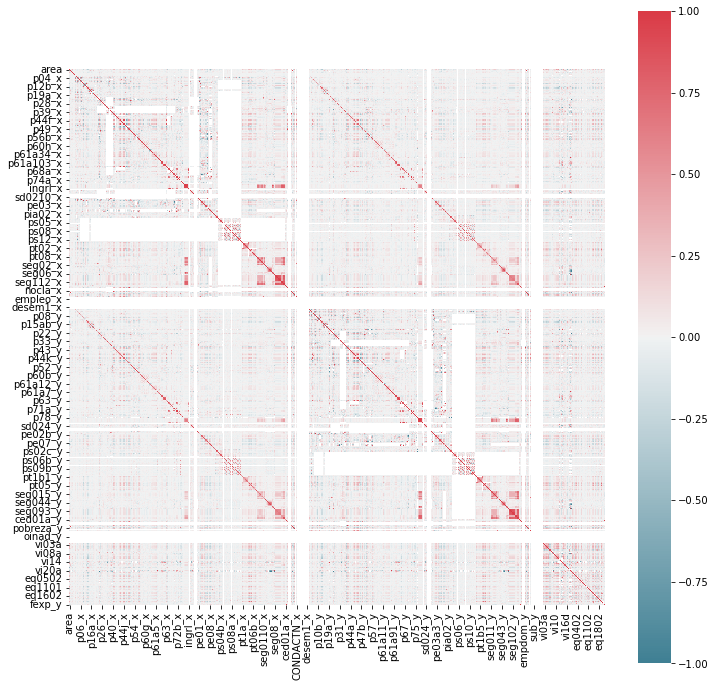

In [24]:
#Visualizacion de correlacion entre variables con matplotlib y seaborn
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_correlation, mask=np.zeros_like(df_correlation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
warnings.filterwarnings("ignore")

In [25]:
# Descriptivo estadístico en python por variable
df_result.describe().round(2)

,area,ciudad,conglomerado,zona,sector,panelm,vivienda,hogar,p01_x,p02_x,...,eq1702,eq1801,eq1802,eq1901,eq1902,vi22,vi23,vi24,vi25,fexp_y
count,518429.00,518429.00,518429.00,518429.00,518429.0,518429.00,518429.00,518429.00,518429.00,518429.00,...,476446.00,518429.00,132599.00,518429.00,36896.00,518429.00,189781.00,189781.00,328648.00,518429.00
mean,1.43,121166.77,993399.36,397.61,8.6,68.62,2.20,1.00,3.35,1.51,...,2.73,1.74,1.23,1.93,1.01,1.63,2.71,2.06,1.80,154.00
std,0.50,74473.87,80205.30,466.79,14.0,58.64,0.98,0.07,2.17,0.50,...,1.46,0.44,0.58,0.26,0.11,0.48,0.91,0.92,1.61,187.32
min,1.00,10150.00,10.00,0.00,1.0,13.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,13.43
25%,1.00,70150.00,999999.00,3.00,2.0,13.00,1.00,1.00,2.00,1.00,...,2.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,44.70
50%,1.00,111159.00,999999.00,37.00,5.0,23.00,2.00,1.00,3.00,2.00,...,2.00,2.00,1.00,2.00,1.00,2.00,3.00,2.00,1.00,76.50
75%,2.00,170164.00,999999.00,999.00,9.0,123.00,3.00,1.00,4.00,2.00,...,4.00,2.00,1.00,2.00,1.00,2.00,3.00,3.00,2.00,176.55
max,2.00,900451.00,999999.00,999.00,143.0,999.00,6.00,5.00,19.00,2.00,...,11.00,2.00,6.00,2.00,2.00,2.00,6.00,6.00,7.00,872.28
